In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from device import Device
from lorawan import LoRaWAN
from loralong import LoRaLong

# Set device consumption characteristics
# https://www.semtech.com/products/wireless-rf/lora-connect/sx1262
sx1262 = Device()
sx1262.SetTxCurrent(118.0)          # 868~915 MHz/+22dBm
sx1262.SetRxCurrent(5.3)            # DCDC Mode/Rx Boosted, LoRa, 125kHz
sx1262.SetIdleCurrent(0.6)          # RC mode/XOSC off
sx1262.SetSleepCurrent(0.0012)      # Sleep with warm start/RC64k
sx1262.SetVoltage(3.3)

generateImages = 0

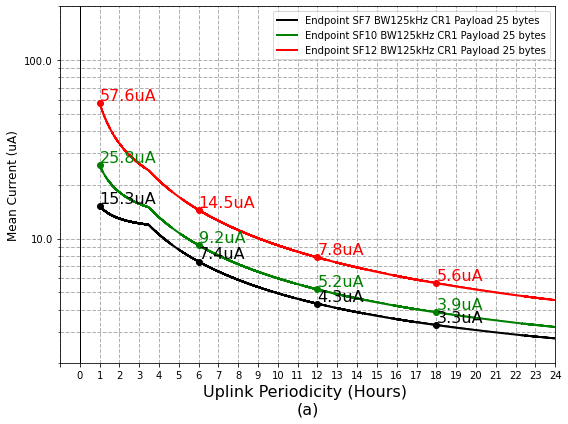

In [2]:
# Comparação de consumo em endpoints (LoRaWAN), variando o SF

sf = [7, 10, 12]
bw = 125
cr = 1
dataLength = 25
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txCurr_array7 = []
txCurr_array10 = []
txCurr_array12 = []

rxCurr_array7 = []
rxCurr_array10 = []
rxCurr_array12 = []

sleepCurr_array7 = []
sleepCurr_array10 = []
sleepCurr_array12 = []

totalMeanCon_array7 = []
totalMeanCon_array10 = []
totalMeanCon_array12 = []

for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)
    
    endpoint = LoRaWAN(8, sf[0], bw, cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaWAN(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array7.append((tx_mAh/total_mAh)*100)
    rxCurr_array7.append((rx_mAh/total_mAh)*100)
    sleepCurr_array7.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array7.append((total_mAh/(totalTime/3600))*1000)

    endpoint = LoRaWAN(8, sf[1], bw, cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaWAN(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array10.append((tx_mAh/total_mAh)*100)
    rxCurr_array10.append((rx_mAh/total_mAh)*100)
    sleepCurr_array10.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array10.append((total_mAh/(totalTime/3600))*1000)

    endpoint = LoRaWAN(8, sf[2], bw, cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaWAN(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array12.append((tx_mAh/total_mAh)*100)
    rxCurr_array12.append((rx_mAh/total_mAh)*100)
    sleepCurr_array12.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array12.append((total_mAh/(totalTime/3600))*1000)

eixo_x = periodicityH_array
eixo_y1 = totalMeanCon_array7
eixo_y2 = totalMeanCon_array10
eixo_y3 = totalMeanCon_array12

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{7} BW{125}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{10} BW{125}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{12} BW{125}kHz CR{cr} Payload {dataLength} bytes')

ax.set_xlabel('Uplink Periodicity (Hours) \n(a)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=12)
ax.set_yscale('log')
ax.set_ylim(2, 200)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=16, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig('lorawan_ep_meanCurXappPer_sf.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

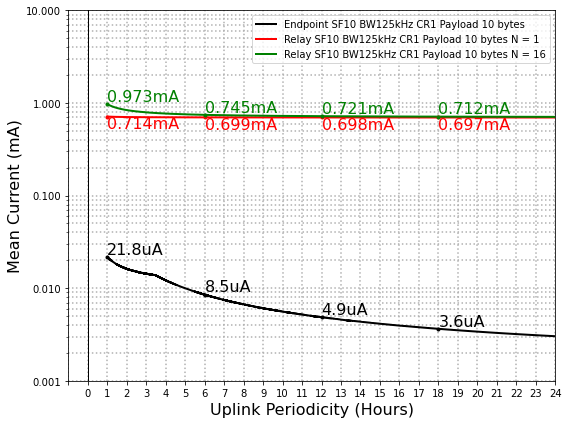

In [3]:
# Comparação de endpoints e relays em LoRaWAN, variando o número de endpoints conectados ao relay (N)

sf = 10
bw = 125
cr = 1
dataLength = 10
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

periodicityS = 24*60*60
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txEpCurr_array = []
rxEpCurr_array = []
sleepEpCurr_array = []
totalEpMeanCon_array = []

txRlN1Curr_array = []
rxRlN1Curr_array = []
sleepRlN1Curr_array = []
totalRlN1MeanCon_array = []

txRlN4Curr_array = []
rxRlN4Curr_array = []
sleepRlN4Curr_array = []
totalRlN4MeanCon_array = []

txRlN8Curr_array = []
rxRlN8Curr_array = []
sleepRlN8Curr_array = []
totalRlN8MeanCon_array = []

txRlN16Curr_array = []
rxRlN16Curr_array = []
sleepRlN16Curr_array = []
totalRlN16MeanCon_array = []

endpoint = LoRaWAN(dataLength, sf, bw, cr)
relay = LoRaWAN(dataLength, sf, bw, cr)

for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)

    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaWAN(periodicityS, dataLength, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txEpCurr_array.append((tx_mAh/total_mAh)*100)
    rxEpCurr_array.append((rx_mAh/total_mAh)*100)
    sleepEpCurr_array.append((sleep_mAh/total_mAh)*100)
    totalEpMeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 1
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS, dataLength, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN1Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN1Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN1Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN1MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 4
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS, dataLength, simDuration, n)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN4Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN4Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN4Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN4MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 8
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS, dataLength, simDuration, n)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN8Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN8Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN8Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN8MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 16
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS, dataLength, simDuration, n)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN16Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN16Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN16Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN16MeanCon_array.append((total_mAh/(totalTime/3600)))


eixo_x = periodicityH_array
eixo_y1 = totalEpMeanCon_array
eixo_y2 = totalRlN1MeanCon_array
eixo_y4 = totalRlN8MeanCon_array
eixo_y5 = totalRlN16MeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 1')
ax.plot(eixo_x, eixo_y5, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 16')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Mean Current (mA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(0.001, 10)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='green', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m*1000:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.3f}mA', fontsize=16, ha='left', va='top', color='red')
    ax.text(x_m, y5_m, f'{y5_m:.3f}mA', fontsize=16, ha='left', va='bottom', color='green')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig('lorawan_rl_meanCurrXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

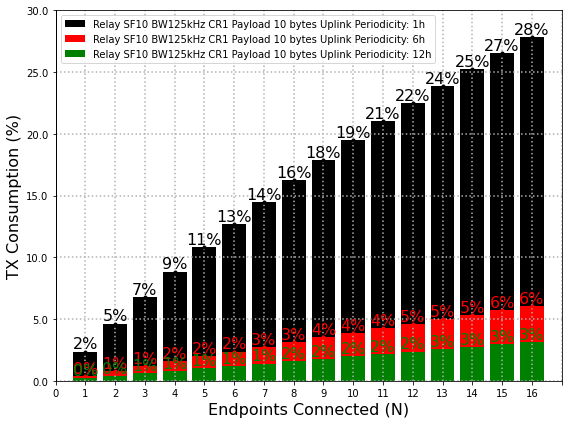

In [4]:
# Comparação de % de consumo do Tx em relays (LoRaWAN), variando o número de endpoints conectados ao relay (N) e a periodicidade de uplink da aplicação

sf = 10
bw = 125
cr = 1
dataLength = 10
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

N = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
periodicityS = 3600

txRl1Time = []
rxRl1Time = []
sleepRl1Time = []
txRl1Curr_array = []
rxRl1Curr_array = []
sleepRl1Curr_array = []
totalRl1MeanCon_array = []

txRl3Time = []
rxRl3Time = []
sleepRl3Time = []
txRl3Curr_array = []
rxRl3Curr_array = []
sleepRl3Curr_array = []
totalRl3MeanCon_array = []

txRl6Time = []
rxRl6Time = []
sleepRl6Time = []
txRl6Curr_array = []
rxRl6Curr_array = []
sleepRl6Curr_array = []
totalRl6MeanCon_array = []

txRl9Time = []
rxRl9Time = []
sleepRl9Time = []
txRl9Curr_array = []
rxRl9Curr_array = []
sleepRl9Curr_array = []
totalRl9MeanCon_array = []

txRl12Time = []
rxRl12Time = []
sleepRl12Time = []
txRl12Curr_array = []
rxRl12Curr_array = []
sleepRl12Curr_array = []
totalRl12MeanCon_array = []

txRl24Time = []
rxRl24Time = []
sleepRl24Time = []
txRl24Curr_array = []
rxRl24Curr_array = []
sleepRl24Curr_array = []
totalRl24MeanCon_array = []

relay = LoRaWAN(dataLength, sf, bw, cr)
for n in N:
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS, dataLength, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    txRl1Time.append((txTime/totalTime)*100)
    rxRl1Time.append((rxTime/totalTime)*100)
    sleepRl1Time.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRl1Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl1Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl1Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl1MeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS*3, dataLength, simDuration, n) 
    totalTime = txTime + rxTime + idleTime + sleepTime
    txRl3Time.append((txTime/totalTime)*100)
    rxRl3Time.append((rxTime/totalTime)*100)
    sleepRl3Time.append((sleepTime/totalTime)*100)  
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRl3Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl3Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl3Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl3MeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS*6, dataLength, simDuration, n)  
    totalTime = txTime + rxTime + idleTime + sleepTime 
    txRl6Time.append((txTime/totalTime)*100)
    rxRl6Time.append((rxTime/totalTime)*100)
    sleepRl6Time.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRl6Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl6Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl6Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl6MeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS*9, dataLength, simDuration, n)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    txRl9Time.append((txTime/totalTime)*100)
    rxRl9Time.append((rxTime/totalTime)*100)
    sleepRl9Time.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRl9Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl9Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl9Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl9MeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS*12, dataLength, simDuration, n)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    txRl12Time.append((txTime/totalTime)*100)
    rxRl12Time.append((rxTime/totalTime)*100)
    sleepRl12Time.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRl12Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl12Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl12Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl12MeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayConfirmedLoRaWAN(periodicityS*24, dataLength, simDuration, n)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    txRl24Time.append((txTime/totalTime)*100)
    rxRl24Time.append((rxTime/totalTime)*100)
    sleepRl24Time.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRl24Curr_array.append((tx_mAh/total_mAh)*100)
    rxRl24Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRl24Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRl24MeanCon_array.append((total_mAh/(totalTime/3600))*1000)


eixo_x = N
eixo_y1 = txRl1Curr_array
eixo_y2 = txRl6Curr_array
eixo_y3 = txRl12Curr_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 1h')
ax.bar(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 6h')
ax.bar(eixo_x, eixo_y3, color='green', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes Uplink Periodicity: 12h')
ax.set_xlabel('Endpoints Connected (N)', fontsize=16)
ax.set_ylabel('TX Consumption (%)', fontsize=16)
ax.set_ylim(0, 30)
ax.set_xlim(0, 17)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 or x == 17 else f'{int(x)}'))

for x_m in N:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y3_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    # ax.plot(x_m, y3_m, marker='.', color='green', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m:.0f}%', fontsize=16, ha='center', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.0f}%', fontsize=16, ha='center', va='bottom', color='red')
    ax.text(x_m, y3_m, f'{y3_m:.0f}%', fontsize=16, ha='center', va='bottom', color='green')


ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig('lorawan_rl_txConsXn.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

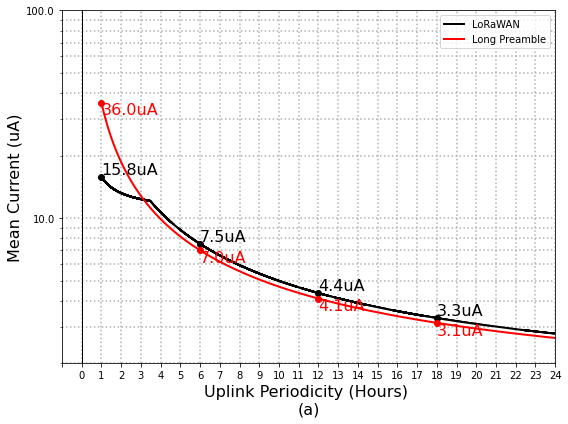

In [5]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 7

sf = 7
bw = 125
cr = 1
pkt = 25

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(a)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1    
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

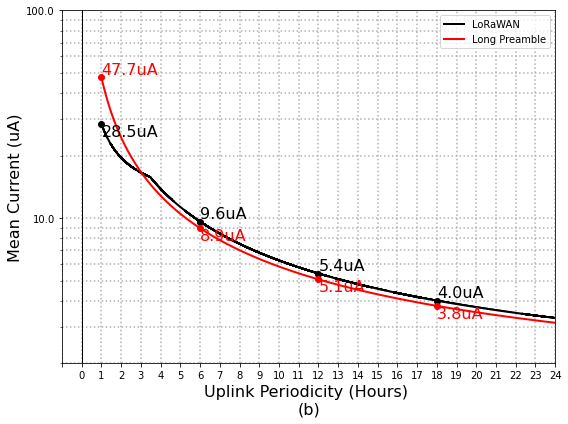

In [6]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 10

sf = 10
bw = 125
cr = 1
pkt = 25

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(b)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

m_y1 = np.interp(1, eixo_x, eixo_y1)  # estima o y naquele x
m_y3 = np.interp(1, eixo_x, eixo_y3)  # estima o y naquele x
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.plot(1, m_y1, marker='o', color='black', markersize=6)
ax.text(1, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='top', color='black')
ax.plot(1, m_y3, marker='o', color='red', markersize=6)
ax.text(1, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

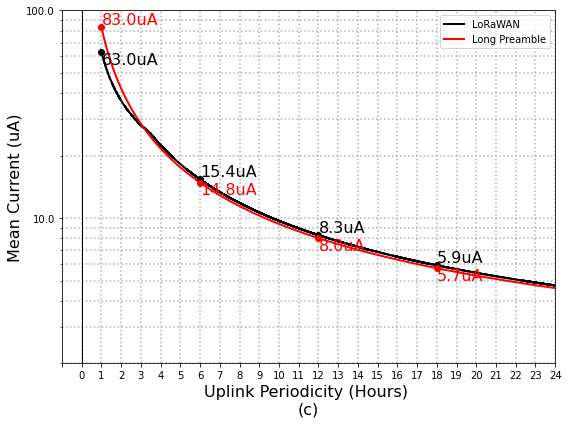

In [7]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 12

sf = 12
bw = 125
cr = 1
pkt = 25

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(c)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

m_y1 = np.interp(1, eixo_x, eixo_y1)  # estima o y naquele x
m_y3 = np.interp(1, eixo_x, eixo_y3)  # estima o y naquele x
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.plot(1, m_y1, marker='o', color='black', markersize=6)
ax.text(1, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='top', color='black')
ax.plot(1, m_y3, marker='o', color='red', markersize=6)
ax.text(1, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

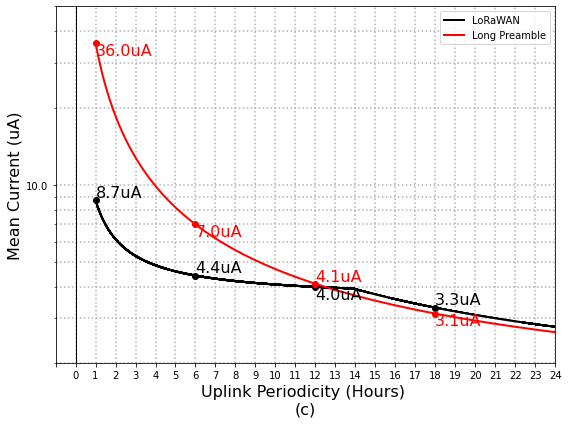

In [8]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 7 e ppm = 10

sf = 7
bw = 125
cr = 1
pkt = 25
ppm = 10

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(c)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 50)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

m_y1 = np.interp(12, eixo_x, eixo_y1)  # estima o y naquele x
m_y3 = np.interp(12, eixo_x, eixo_y3)  # estima o y naquele x
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.plot(12, m_y1, marker='o', color='black', markersize=6)
ax.text(12, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='top', color='black')
ax.plot(12, m_y3, marker='o', color='red', markersize=6)
ax.text(12, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')


ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

In [ ]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 7 e ppm = 20

sf = 7
bw = 125
cr = 1
pkt = 25
ppm = 20

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(b)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 50)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

m_y1 = np.interp(6, eixo_x, eixo_y1)  # estima o y naquele x
m_y3 = np.interp(6, eixo_x, eixo_y3)  # estima o y naquele x
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.plot(6, m_y1, marker='o', color='black', markersize=6)
ax.text(6, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='top', color='black')
ax.plot(6, m_y3, marker='o', color='red', markersize=6)
ax.text(6, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

loRa Extensor Comparison - endpoint uplink simulation
Device Consumption x Application Uplink Periodicity
Simulation Duration [y]: 10.0


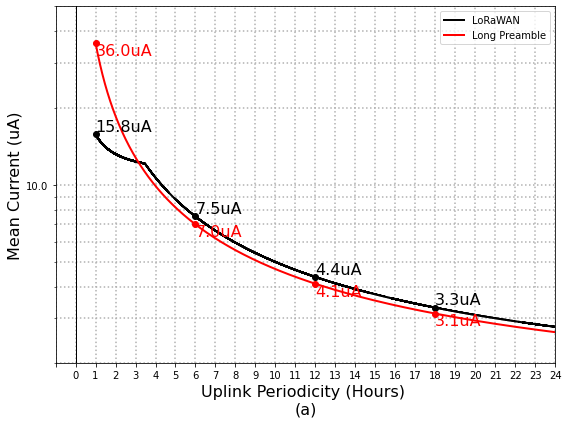

In [ ]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 7 e ppm = 40

sf = 7
bw = 125
cr = 1
pkt = 25
ppm = 40

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(a)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 50)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

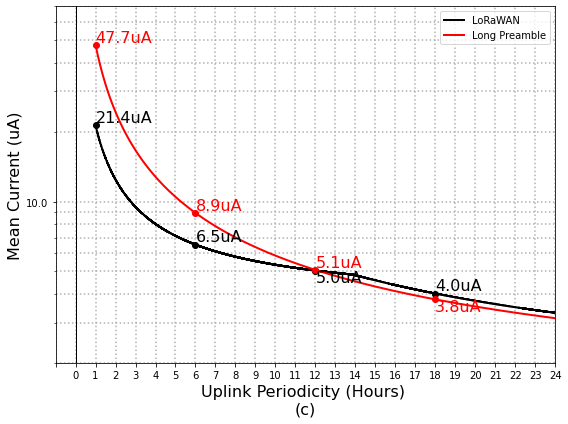

In [ ]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 10 e ppm = 10

sf = 10
bw = 125
cr = 1
pkt = 25
ppm = 10

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(c)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 70)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

x_marcar = [12]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='top', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

x_marcar = [18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

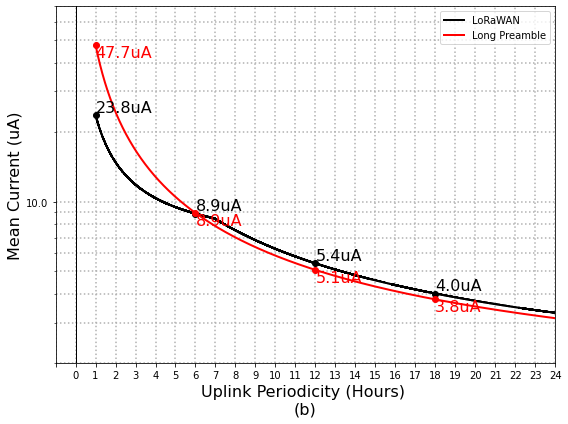

In [ ]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 10 e ppm = 20

sf = 10
bw = 125
cr = 1
pkt = 25
ppm = 20

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(b)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 70)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1    
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

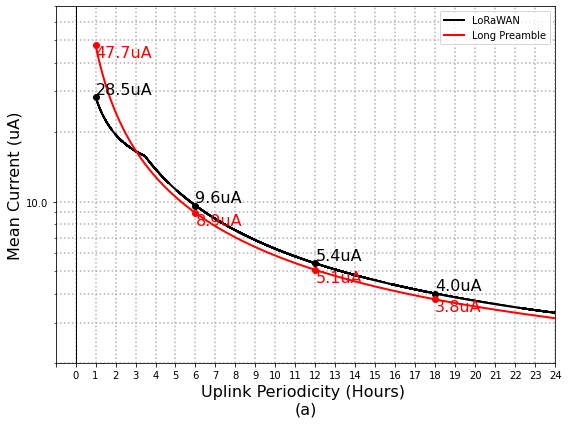

In [ ]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 10 e ppm = 40

sf = 10
bw = 125
cr = 1
pkt = 25
ppm = 40

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(a)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(2, 70)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1    
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

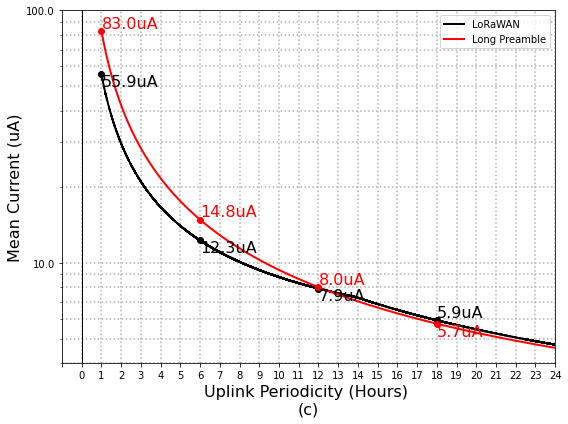

In [ ]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 12 e ppm = 10

sf = 12
bw = 125
cr = 1
pkt = 25
ppm = 10

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(c)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(4, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='top', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

x_marcar = [18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

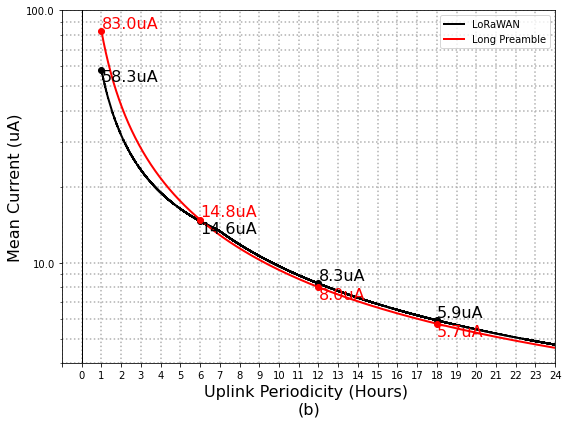

In [ ]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 12 e ppm = 20

sf = 12
bw = 125
cr = 1
pkt = 25
ppm = 20

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(b)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(4, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='top', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

x_marcar = [12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1    
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

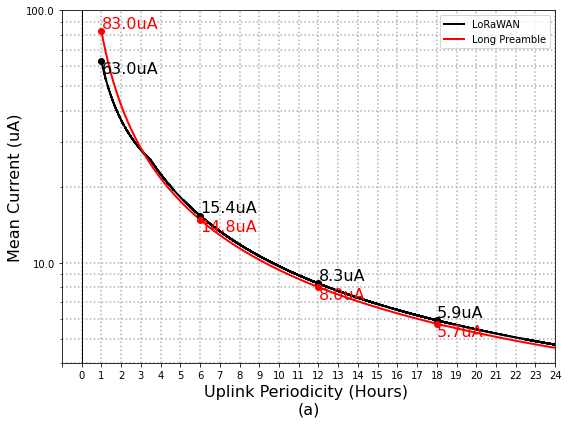

In [ ]:
# Comparação de endpoints em LoRaWAN e Long Preamble, SF = 12 e ppm = 40

sf = 12
bw = 125
cr = 1
pkt = 25
ppm = 40

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt + 8
ep_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)
ep_lorawan.n_accuracy = ppm

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ep_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)

ep_lorawan_TxTime_array = []
ep_lorawan_RxTime_array = []
ep_lorawan_SleepTime_array = []
ep_lorawan_TxCurr_array = []
ep_lorawan_RxCurr_array = []
ep_lorawan_SleepCurr_array = []
ep_lorawan_TotalMeanCon_array = []

ep_long_TxTime_array = []
ep_long_RxTime_array = []
ep_long_SleepTime_array = []
ep_long_TxCurr_array = []
ep_long_RxCurr_array = []
ep_long_SleepCurr_array = []
ep_long_TotalMeanCon_array = []

periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    txTime, rxTime, idleTime, sleepTime = ep_lorawan.SimulateEndpointLoRaWAN(pS, pkt_wan, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_lorawan_TxTime_array.append((txTime/totalTime)*100)
    ep_lorawan_RxTime_array.append((rxTime/totalTime)*100)
    ep_lorawan_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_lorawan_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_lorawan_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_lorawan_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_lorawan_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = ep_long.SimulateEndpointLoRaLong(pS, pkt_lng, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    ep_long_TxTime_array.append((txTime/totalTime)*100)
    ep_long_RxTime_array.append((rxTime/totalTime)*100)
    ep_long_SleepTime_array.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ep_long_TxCurr_array.append((tx_mAh/total_mAh)*100)
    ep_long_RxCurr_array.append((rx_mAh/total_mAh)*100)
    ep_long_SleepCurr_array.append((sleep_mAh/total_mAh)*100)
    ep_long_TotalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)
    
eixo_x = periodicityH_array
eixo_y1 = ep_lorawan_TotalMeanCon_array
eixo_y3 = ep_long_TotalMeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Long Preamble')
ax.set_xlabel('Uplink Periodicity (Hours) \n(a)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(4, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='top', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='bottom', color='red')

x_marcar = [6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{m_y1:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y3, f'{m_y3:.1f}uA', fontsize=16, ha='left', va='top', color='red')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1    
if generateImages == 1:
    plt.savefig(f'ep_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_ppm{ppm:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

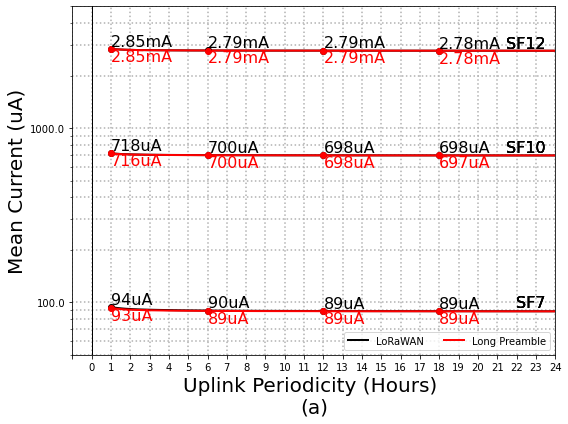

In [ ]:
# Comparação de relays em LoRaWAN e Long Preamble, variando o SF e com 1 endpoint conectado ao relay (N=1)

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf = 7
bw = 125
cr = 1
pkt = 25

n = 1

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt
ry_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ry_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)


ry_lorawan_TxTime_array_SF7 = []
ry_lorawan_RxTime_array_SF7 = []
ry_lorawan_SleepTime_array_SF7 = []
ry_lorawan_TxCurr_array_SF7 = []
ry_lorawan_RxCurr_array_SF7 = []
ry_lorawan_SleepCurr_array_SF7 = []
ry_lorawan_TotalMeanCon_array_SF7 = []

ry_long_TxTime_array_SF7 = []
ry_long_RxTime_array_SF7 = []
ry_long_SleepTime_array_SF7 = []
ry_long_TxCurr_array_SF7 = []
ry_long_RxCurr_array_SF7 = []
ry_long_SleepCurr_array_SF7 = []
ry_long_TotalMeanCon_array_SF7 = []


ry_lorawan_TxTime_array_SF10 = []
ry_lorawan_RxTime_array_SF10 = []
ry_lorawan_SleepTime_array_SF10 = []
ry_lorawan_TxCurr_array_SF10 = []
ry_lorawan_RxCurr_array_SF10 = []
ry_lorawan_SleepCurr_array_SF10 = []
ry_lorawan_TotalMeanCon_array_SF10 = []

ry_long_TxTime_array_SF10 = []
ry_long_RxTime_array_SF10 = []
ry_long_SleepTime_array_SF10 = []
ry_long_TxCurr_array_SF10 = []
ry_long_RxCurr_array_SF10 = []
ry_long_SleepCurr_array_SF10 = []
ry_long_TotalMeanCon_array_SF10 = []


ry_lorawan_TxTime_array_SF12 = []
ry_lorawan_RxTime_array_SF12 = []
ry_lorawan_SleepTime_array_SF12 = []
ry_lorawan_TxCurr_array_SF12 = []
ry_lorawan_RxCurr_array_SF12 = []
ry_lorawan_SleepCurr_array_SF12 = []
ry_lorawan_TotalMeanCon_array_SF12 = []

ry_long_TxTime_array_SF12 = []
ry_long_RxTime_array_SF12 = []
ry_long_SleepTime_array_SF12 = []
ry_long_TxCurr_array_SF12 = []
ry_long_RxCurr_array_SF12 = []
ry_long_SleepCurr_array_SF12 = []
ry_long_TotalMeanCon_array_SF12 = []


periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    ry_lorawan.SetSF(7)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF7.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF7.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF7.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF7.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF7.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF7.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF7.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(7)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF7.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF7.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF7.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF7.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF7.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF7.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF7.append((total_mAh/(totalTime/3600)*1000))

    ry_lorawan.SetSF(10)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF10.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF10.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF10.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF10.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF10.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF10.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF10.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(10)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF10.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF10.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF10.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF10.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF10.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF10.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF10.append((total_mAh/(totalTime/3600)*1000))

    ry_lorawan.SetSF(12)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF12.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF12.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF12.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF12.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF12.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF12.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF12.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(12)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF12.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF12.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF12.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF12.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF12.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF12.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF12.append((total_mAh/(totalTime/3600)*1000))


eixo_x = periodicityH_array
eixo_y1 = ry_lorawan_TotalMeanCon_array_SF7
eixo_y2 = ry_long_TotalMeanCon_array_SF7
eixo_y3 = ry_lorawan_TotalMeanCon_array_SF10
eixo_y4 = ry_long_TotalMeanCon_array_SF10
eixo_y5 = ry_lorawan_TotalMeanCon_array_SF12
eixo_y6 = ry_long_TotalMeanCon_array_SF12

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, label=f'Long Preamble')
ax.plot(eixo_x, eixo_y3, color='black', linewidth=2)
ax.plot(eixo_x, eixo_y4, color='red', linewidth=2)
ax.plot(eixo_x, eixo_y5, color='black', linewidth=2)
ax.plot(eixo_x, eixo_y6, color='red', linewidth=2)

ax.set_xlabel('Uplink Periodicity (Hours) \n(a)', fontsize=20)
ax.set_ylabel('Mean Current (uA)', fontsize=20)
ax.set_yscale('log')
ax.set_ylim(50, 5000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y2 = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    m_y4 = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    m_y5 = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    m_y6 = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{(m_y1):.0f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y2, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y2, f'{(m_y2):.0f}uA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 90, 'SF7', fontsize=16, ha='right', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y3, f'{(m_y3):.0f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y4, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y4, f'{(m_y4):.0f}uA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 700, 'SF10', fontsize=16, ha='right', va='bottom', color='black')
    ax.plot(x_m, m_y5, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y5, f'{(m_y5/1000):.2f}mA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y6, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y6, f'{(m_y6/1000):.2f}mA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 2780, 'SF12', fontsize=16, ha='right', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend(loc='lower right', ncol=2)
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'rl_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_N{n:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()


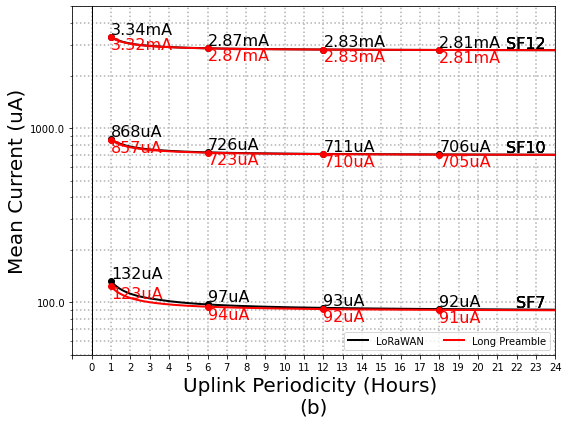

In [ ]:
# Comparação de relays em LoRaWAN e Long Preamble, variando o SF e com 8 endpoints conectados ao relay (N=8)

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf = 7
bw = 125
cr = 1
pkt = 25

n = 8

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt
ry_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ry_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)


ry_lorawan_TxTime_array_SF7 = []
ry_lorawan_RxTime_array_SF7 = []
ry_lorawan_SleepTime_array_SF7 = []
ry_lorawan_TxCurr_array_SF7 = []
ry_lorawan_RxCurr_array_SF7 = []
ry_lorawan_SleepCurr_array_SF7 = []
ry_lorawan_TotalMeanCon_array_SF7 = []

ry_long_TxTime_array_SF7 = []
ry_long_RxTime_array_SF7 = []
ry_long_SleepTime_array_SF7 = []
ry_long_TxCurr_array_SF7 = []
ry_long_RxCurr_array_SF7 = []
ry_long_SleepCurr_array_SF7 = []
ry_long_TotalMeanCon_array_SF7 = []


ry_lorawan_TxTime_array_SF10 = []
ry_lorawan_RxTime_array_SF10 = []
ry_lorawan_SleepTime_array_SF10 = []
ry_lorawan_TxCurr_array_SF10 = []
ry_lorawan_RxCurr_array_SF10 = []
ry_lorawan_SleepCurr_array_SF10 = []
ry_lorawan_TotalMeanCon_array_SF10 = []

ry_long_TxTime_array_SF10 = []
ry_long_RxTime_array_SF10 = []
ry_long_SleepTime_array_SF10 = []
ry_long_TxCurr_array_SF10 = []
ry_long_RxCurr_array_SF10 = []
ry_long_SleepCurr_array_SF10 = []
ry_long_TotalMeanCon_array_SF10 = []


ry_lorawan_TxTime_array_SF12 = []
ry_lorawan_RxTime_array_SF12 = []
ry_lorawan_SleepTime_array_SF12 = []
ry_lorawan_TxCurr_array_SF12 = []
ry_lorawan_RxCurr_array_SF12 = []
ry_lorawan_SleepCurr_array_SF12 = []
ry_lorawan_TotalMeanCon_array_SF12 = []

ry_long_TxTime_array_SF12 = []
ry_long_RxTime_array_SF12 = []
ry_long_SleepTime_array_SF12 = []
ry_long_TxCurr_array_SF12 = []
ry_long_RxCurr_array_SF12 = []
ry_long_SleepCurr_array_SF12 = []
ry_long_TotalMeanCon_array_SF12 = []


periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    ry_lorawan.SetSF(7)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF7.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF7.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF7.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF7.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF7.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF7.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF7.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(7)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF7.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF7.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF7.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF7.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF7.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF7.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF7.append((total_mAh/(totalTime/3600)*1000))

    ry_lorawan.SetSF(10)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF10.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF10.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF10.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF10.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF10.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF10.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF10.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(10)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF10.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF10.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF10.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF10.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF10.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF10.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF10.append((total_mAh/(totalTime/3600)*1000))

    ry_lorawan.SetSF(12)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF12.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF12.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF12.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF12.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF12.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF12.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF12.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(12)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF12.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF12.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF12.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF12.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF12.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF12.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF12.append((total_mAh/(totalTime/3600)*1000))


eixo_x = periodicityH_array
eixo_y1 = ry_lorawan_TotalMeanCon_array_SF7
eixo_y2 = ry_long_TotalMeanCon_array_SF7
eixo_y3 = ry_lorawan_TotalMeanCon_array_SF10
eixo_y4 = ry_long_TotalMeanCon_array_SF10
eixo_y5 = ry_lorawan_TotalMeanCon_array_SF12
eixo_y6 = ry_long_TotalMeanCon_array_SF12

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, label=f'Long Preamble')
ax.plot(eixo_x, eixo_y3, color='black', linewidth=2)
ax.plot(eixo_x, eixo_y4, color='red', linewidth=2)
ax.plot(eixo_x, eixo_y5, color='black', linewidth=2)
ax.plot(eixo_x, eixo_y6, color='red', linewidth=2)

ax.set_xlabel('Uplink Periodicity (Hours) \n(b)', fontsize=20)
ax.set_ylabel('Mean Current (uA)', fontsize=20)
ax.set_yscale('log')
ax.set_ylim(50, 5000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y2 = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    m_y4 = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    m_y5 = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    m_y6 = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{(m_y1):.0f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y2, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y2, f'{(m_y2):.0f}uA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 90, 'SF7', fontsize=16, ha='right', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y3, f'{(m_y3):.0f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y4, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y4, f'{(m_y4):.0f}uA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 700, 'SF10', fontsize=16, ha='right', va='bottom', color='black')
    ax.plot(x_m, m_y5, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y5, f'{(m_y5/1000):.2f}mA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y6, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y6, f'{(m_y6/1000):.2f}mA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 2780, 'SF12', fontsize=16, ha='right', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend(loc='lower right', ncol=2)
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'rl_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_N{n:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()


loRa Extensor Comparison - relay uplink simulation
Device Consumption x Application Uplink Periodicity
Simulation Duration [y]: 10.0


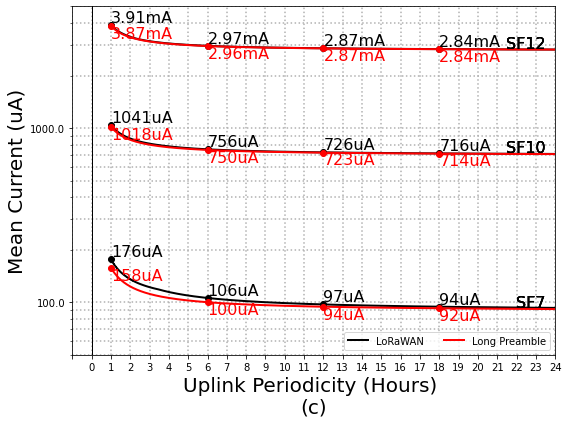

In [ ]:
# Comparação de relays em LoRaWAN e Long Preamble, variando o SF e com 16 endpoints conectados ao relay (N=16)

simDurationH = 24*365*10
simDuration = simDurationH * 60*60

sf = 7
bw = 125
cr = 1
pkt = 25

n = 16

sf_wan = sf
bw_wan = bw
cr_wan = cr
pkt_wan = pkt
ry_lorawan = LoRaWAN(pkt_wan, sf_wan, bw_wan, cr_wan)

sf_lng = sf
bw_lng = bw
cr_lng = cr
pkt_lng = pkt
ry_long = LoRaLong(pkt_lng, sf_lng, bw_lng, cr_lng)


ry_lorawan_TxTime_array_SF7 = []
ry_lorawan_RxTime_array_SF7 = []
ry_lorawan_SleepTime_array_SF7 = []
ry_lorawan_TxCurr_array_SF7 = []
ry_lorawan_RxCurr_array_SF7 = []
ry_lorawan_SleepCurr_array_SF7 = []
ry_lorawan_TotalMeanCon_array_SF7 = []

ry_long_TxTime_array_SF7 = []
ry_long_RxTime_array_SF7 = []
ry_long_SleepTime_array_SF7 = []
ry_long_TxCurr_array_SF7 = []
ry_long_RxCurr_array_SF7 = []
ry_long_SleepCurr_array_SF7 = []
ry_long_TotalMeanCon_array_SF7 = []


ry_lorawan_TxTime_array_SF10 = []
ry_lorawan_RxTime_array_SF10 = []
ry_lorawan_SleepTime_array_SF10 = []
ry_lorawan_TxCurr_array_SF10 = []
ry_lorawan_RxCurr_array_SF10 = []
ry_lorawan_SleepCurr_array_SF10 = []
ry_lorawan_TotalMeanCon_array_SF10 = []

ry_long_TxTime_array_SF10 = []
ry_long_RxTime_array_SF10 = []
ry_long_SleepTime_array_SF10 = []
ry_long_TxCurr_array_SF10 = []
ry_long_RxCurr_array_SF10 = []
ry_long_SleepCurr_array_SF10 = []
ry_long_TotalMeanCon_array_SF10 = []


ry_lorawan_TxTime_array_SF12 = []
ry_lorawan_RxTime_array_SF12 = []
ry_lorawan_SleepTime_array_SF12 = []
ry_lorawan_TxCurr_array_SF12 = []
ry_lorawan_RxCurr_array_SF12 = []
ry_lorawan_SleepCurr_array_SF12 = []
ry_lorawan_TotalMeanCon_array_SF12 = []

ry_long_TxTime_array_SF12 = []
ry_long_RxTime_array_SF12 = []
ry_long_SleepTime_array_SF12 = []
ry_long_TxCurr_array_SF12 = []
ry_long_RxCurr_array_SF12 = []
ry_long_SleepCurr_array_SF12 = []
ry_long_TotalMeanCon_array_SF12 = []


periodicityS = 86400
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []
for pS in periodicityS_array:

    periodicityMin_array.append(pS/60)
    periodicityH_array.append(pS/3600)

    ry_lorawan.SetSF(7)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF7.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF7.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF7.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF7.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF7.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF7.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF7.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(7)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF7.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF7.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF7.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF7.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF7.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF7.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF7.append((total_mAh/(totalTime/3600)*1000))

    ry_lorawan.SetSF(10)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF10.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF10.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF10.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF10.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF10.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF10.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF10.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(10)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF10.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF10.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF10.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF10.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF10.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF10.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF10.append((total_mAh/(totalTime/3600)*1000))

    ry_lorawan.SetSF(12)
    txTime, rxTime, idleTime, sleepTime = ry_lorawan.SimulateRelayConfirmedLoRaWAN(pS, pkt_wan, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_lorawan_TxTime_array_SF12.append((txTime/totalTime)*100)
    ry_lorawan_RxTime_array_SF12.append((rxTime/totalTime)*100)
    ry_lorawan_SleepTime_array_SF12.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_lorawan_TxCurr_array_SF12.append((tx_mAh/total_mAh)*100)
    ry_lorawan_RxCurr_array_SF12.append((rx_mAh/total_mAh)*100)
    ry_lorawan_SleepCurr_array_SF12.append((sleep_mAh/total_mAh)*100)
    ry_lorawan_TotalMeanCon_array_SF12.append((total_mAh/(totalTime/3600)*1000))
    ry_long.SetSF(12)
    txTime, rxTime, idleTime, sleepTime = ry_long.SimulateRelayLoRaLong(pS, pkt_lng, simDuration, n)
    totalTime = txTime + rxTime + idleTime + sleepTime
    ry_long_TxTime_array_SF12.append((txTime/totalTime)*100)
    ry_long_RxTime_array_SF12.append((rxTime/totalTime)*100)
    ry_long_SleepTime_array_SF12.append((sleepTime/totalTime)*100)
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    ry_long_TxCurr_array_SF12.append((tx_mAh/total_mAh)*100)
    ry_long_RxCurr_array_SF12.append((rx_mAh/total_mAh)*100)
    ry_long_SleepCurr_array_SF12.append((sleep_mAh/total_mAh)*100)
    ry_long_TotalMeanCon_array_SF12.append((total_mAh/(totalTime/3600)*1000))


eixo_x = periodicityH_array
eixo_y1 = ry_lorawan_TotalMeanCon_array_SF7
eixo_y2 = ry_long_TotalMeanCon_array_SF7
eixo_y3 = ry_lorawan_TotalMeanCon_array_SF10
eixo_y4 = ry_long_TotalMeanCon_array_SF10
eixo_y5 = ry_lorawan_TotalMeanCon_array_SF12
eixo_y6 = ry_long_TotalMeanCon_array_SF12

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, label=f'LoRaWAN')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, label=f'Long Preamble')
ax.plot(eixo_x, eixo_y3, color='black', linewidth=2)
ax.plot(eixo_x, eixo_y4, color='red', linewidth=2)
ax.plot(eixo_x, eixo_y5, color='black', linewidth=2)
ax.plot(eixo_x, eixo_y6, color='red', linewidth=2)

ax.set_xlabel('Uplink Periodicity (Hours) \n(c)', fontsize=20)
ax.set_ylabel('Mean Current (uA)', fontsize=20)
ax.set_yscale('log')
ax.set_ylim(50, 5000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    m_y1 = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    m_y2 = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    m_y3 = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    m_y4 = np.interp(x_m, eixo_x, eixo_y4)  # estima o y naquele x
    m_y5 = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    m_y6 = np.interp(x_m, eixo_x, eixo_y6)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, m_y1, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y1, f'{(m_y1):.0f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y2, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y2, f'{(m_y2):.0f}uA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 90, 'SF7', fontsize=16, ha='right', va='bottom', color='black')
    ax.plot(x_m, m_y3, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y3, f'{(m_y3):.0f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y4, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y4, f'{(m_y4):.0f}uA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 700, 'SF10', fontsize=16, ha='right', va='bottom', color='black')
    ax.plot(x_m, m_y5, marker='o', color='black', markersize=6)
    ax.text(x_m, m_y5, f'{(m_y5/1000):.2f}mA', fontsize=16, ha='left', va='bottom', color='black')
    ax.plot(x_m, m_y6, marker='o', color='red', markersize=6)
    ax.text(x_m, m_y6, f'{(m_y6/1000):.2f}mA', fontsize=16, ha='left', va='top', color='red')
    ax.text(23.5, 2780, 'SF12', fontsize=16, ha='right', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend(loc='lower right', ncol=2)
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig(f'rl_meanCurrXappPer_BW{bw:0.0f}_SF{sf:0.0f}_N{n:0.0f}.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()


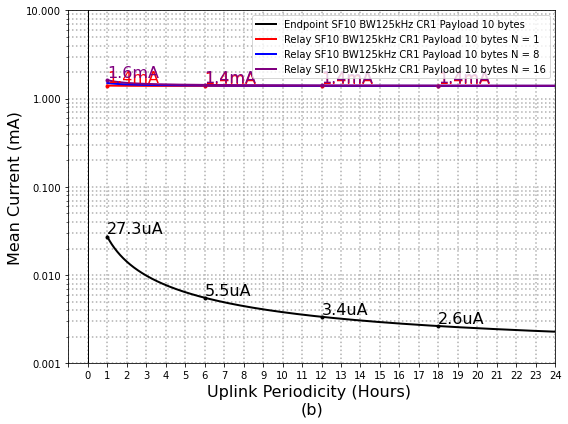

In [ ]:
# Comparação de endpoints e relays em Long Preamble, variando o tamanho do preambulo do endpoint (500ms) e a periodicidade do CAD de relay (500ms)

sf = 10
bw = 125
cr = 1
dataLength = 10
PreambleLength = 500
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

periodicityS = 24*60*60
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txEpCurr_array = []
rxEpCurr_array = []
sleepEpCurr_array = []
totalEpMeanCon_array = []

txRlN1Curr_array = []
rxRlN1Curr_array = []
sleepRlN1Curr_array = []
totalRlN1MeanCon_array = []

txRlN8Curr_array = []
rxRlN8Curr_array = []
sleepRlN8Curr_array = []
totalRlN8MeanCon_array = []

txRlN16Curr_array = []
rxRlN16Curr_array = []
sleepRlN16Curr_array = []
totalRlN16MeanCon_array = []

endpoint = LoRaLong(dataLength, sf, bw, cr)
relay = LoRaLong(dataLength, sf, bw, cr)

for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)

    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaLongPreamble(periodicityS, dataLength, simDuration, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txEpCurr_array.append((tx_mAh/total_mAh)*100)
    rxEpCurr_array.append((rx_mAh/total_mAh)*100)
    sleepEpCurr_array.append((sleep_mAh/total_mAh)*100)
    totalEpMeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 1
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN1Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN1Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN1Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN1MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 8
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN8Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN8Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN8Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN8MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 16
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN16Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN16Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN16Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN16MeanCon_array.append((total_mAh/(totalTime/3600)))


eixo_x = periodicityH_array
eixo_y1 = totalEpMeanCon_array
eixo_y2 = totalRlN1MeanCon_array
eixo_y4 = totalRlN8MeanCon_array
eixo_y5 = totalRlN16MeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 1')
ax.plot(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 8')
ax.plot(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 16')
ax.set_xlabel('Uplink Periodicity (Hours) \n(b)', fontsize=16)
ax.set_ylabel('Mean Current (mA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(0.001, 10)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m*1000:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}mA', fontsize=16, ha='left', va='bottom', color='red')
    ax.text(x_m, y5_m, f'{y5_m:.1f}mA', fontsize=16, ha='left', va='bottom', color='purple')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig('loralong_rl_meanCurXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

In [ ]:
# Comparação de endpoints e relays em Long Preamble, variando o tamanho do preambulo do endpoint (1000ms) e a periodicidade do CAD de relay (1000ms)

sf = 10
bw = 125
cr = 1
dataLength = 10
PreambleLength = 1000
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

periodicityS = 24*60*60
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txEpCurr_array = []
rxEpCurr_array = []
sleepEpCurr_array = []
totalEpMeanCon_array = []

txRlN1Curr_array = []
rxRlN1Curr_array = []
sleepRlN1Curr_array = []
totalRlN1MeanCon_array = []

txRlN8Curr_array = []
rxRlN8Curr_array = []
sleepRlN8Curr_array = []
totalRlN8MeanCon_array = []

txRlN16Curr_array = []
rxRlN16Curr_array = []
sleepRlN16Curr_array = []
totalRlN16MeanCon_array = []

endpoint = LoRaLong(dataLength, sf, bw, cr)
relay = LoRaLong(dataLength, sf, bw, cr)

for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)

    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaLongPreamble(periodicityS, dataLength, simDuration, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txEpCurr_array.append((tx_mAh/total_mAh)*100)
    rxEpCurr_array.append((rx_mAh/total_mAh)*100)
    sleepEpCurr_array.append((sleep_mAh/total_mAh)*100)
    totalEpMeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 1
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN1Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN1Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN1Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN1MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 8
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN8Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN8Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN8Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN8MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 16
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN16Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN16Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN16Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN16MeanCon_array.append((total_mAh/(totalTime/3600)))


eixo_x = periodicityH_array
eixo_y1 = totalEpMeanCon_array
eixo_y2 = totalRlN1MeanCon_array
eixo_y4 = totalRlN8MeanCon_array
eixo_y5 = totalRlN16MeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 1')
ax.plot(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 8')
ax.plot(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 16')
ax.set_xlabel('Uplink Periodicity (Hours) \n(b)', fontsize=16)
ax.set_ylabel('Mean Current (mA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(0.001, 10)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m*1000:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}mA', fontsize=16, ha='left', va='bottom', color='red')
    ax.text(x_m, y5_m, f'{y5_m:.1f}mA', fontsize=16, ha='left', va='bottom', color='purple')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig('loralong_rl_meanCurXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

In [ ]:
# Comparação de endpoints e relays em Long Preamble, variando o tamanho do preambulo do endpoint (2000ms) e a periodicidade do CAD de relay (2000ms)

sf = 10
bw = 125
cr = 1
dataLength = 10
PreambleLength = 2000
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

periodicityS = 24*60*60
periodicityS_array = np.linspace(3600, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txEpCurr_array = []
rxEpCurr_array = []
sleepEpCurr_array = []
totalEpMeanCon_array = []

txRlN1Curr_array = []
rxRlN1Curr_array = []
sleepRlN1Curr_array = []
totalRlN1MeanCon_array = []

txRlN8Curr_array = []
rxRlN8Curr_array = []
sleepRlN8Curr_array = []
totalRlN8MeanCon_array = []

txRlN16Curr_array = []
rxRlN16Curr_array = []
sleepRlN16Curr_array = []
totalRlN16MeanCon_array = []

endpoint = LoRaLong(dataLength, sf, bw, cr)
relay = LoRaLong(dataLength, sf, bw, cr)

for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)

    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaLongPreamble(periodicityS, dataLength, simDuration, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txEpCurr_array.append((tx_mAh/total_mAh)*100)
    rxEpCurr_array.append((rx_mAh/total_mAh)*100)
    sleepEpCurr_array.append((sleep_mAh/total_mAh)*100)
    totalEpMeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 1
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN1Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN1Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN1Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN1MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 8
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN8Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN8Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN8Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN8MeanCon_array.append((total_mAh/(totalTime/3600)))

    n = 16
    txTime, rxTime, idleTime, sleepTime = relay.SimulateRelayLoRaLongPreamble(periodicityS, dataLength, simDuration, n, PreambleLength)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txRlN16Curr_array.append((tx_mAh/total_mAh)*100)
    rxRlN16Curr_array.append((rx_mAh/total_mAh)*100)
    sleepRlN16Curr_array.append((sleep_mAh/total_mAh)*100)
    totalRlN16MeanCon_array.append((total_mAh/(totalTime/3600)))


eixo_x = periodicityH_array
eixo_y1 = totalEpMeanCon_array
eixo_y2 = totalRlN1MeanCon_array
eixo_y4 = totalRlN8MeanCon_array
eixo_y5 = totalRlN16MeanCon_array

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='red', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 1')
ax.plot(eixo_x, eixo_y4, color='blue', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 8')
ax.plot(eixo_x, eixo_y5, color='purple', linewidth=2, \
        label=f'Relay SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes N = 16')
ax.set_xlabel('Uplink Periodicity (Hours) \n(b)', fontsize=16)
ax.set_ylabel('Mean Current (mA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(0.001, 10)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [1, 6, 12, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y2_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='.', color='black', markersize=6)
    ax.plot(x_m, y2_m, marker='.', color='red', markersize=6)
    ax.plot(x_m, y5_m, marker='.', color='purple', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m*1000:.1f}uA', fontsize=16, ha='left', va='bottom', color='black')
    ax.text(x_m, y2_m, f'{y2_m:.1f}mA', fontsize=16, ha='left', va='bottom', color='red')
    ax.text(x_m, y5_m, f'{y5_m:.1f}mA', fontsize=16, ha='left', va='bottom', color='purple')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
# generateImages = 1
if generateImages == 1:
    plt.savefig('loralong_rl_meanCurXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()